## Fitting BAO on the Full sample and modified sample in z=0.6-0.7 for the Gaussian Random mock. 

The Steps are:
- Observe the BAO on the true catalog
- Model with GP regression 
- Observe BAO on the modified catalog
- Model with GP regression (Use GP covariance)

Further:
- Model the True 2PCF (with GP covariance) with Gaussian over smooth power law
- Model the modified 2PCF with the same
- Observe the shift in BAO scale (statistically significant?)

More:
- Use True 2PCF GP model as fiducial 
- Model the modified BAO (with GP covariance) using alpha parametrization
- Observe the value of alpha and uncertainty

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from regress_gp import plot_xi,read_2pt
from regress_gp import plot_gauss_model
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) #- ignore deprecation warning for scikit etc. temporarily

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


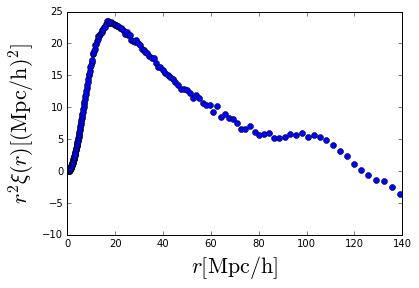

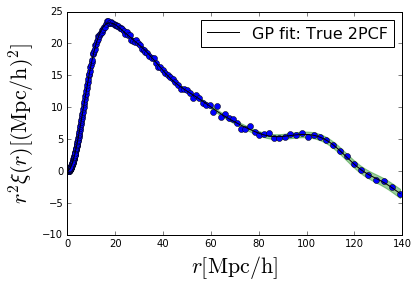

In [2]:
#- Read the true catalog BAO and plot
r,xi,xivar=read_2pt('cor_analysis/mock/treecorr_elg_cond_0.6-0.7.fits')
plot_xi(r,xi,xivar,cut=140,fit=False)
plot_xi(r,xi,xivar,cut=140,fit=True,label='GP fit: True 2PCF')


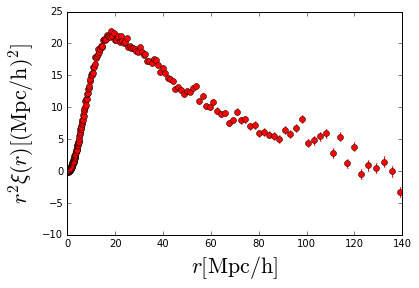

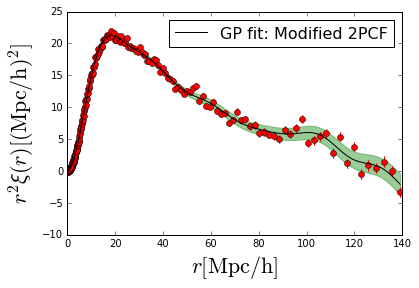

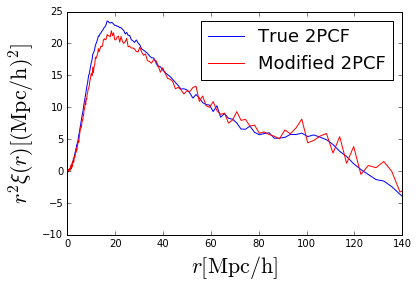

In [3]:
#- Read the modified catalog BAO and plot
r2,xi2,xivar2=read_2pt('cor_analysis/modified_quickcat/treecorr_both_mod_quickcat_0.6-0.7.fits')
plot_xi(r2,xi2,xivar2,cut=140,fit=False,color='red')
plot_xi(r2,xi2,xivar2,cut=140,fit=True,color='red',label='GP fit: Modified 2PCF')
#- show the compare plot
from regress_gp import compare_2pt
compare_2pt('cor_analysis/mock/treecorr_elg_cond_0.6-0.7.fits',
            'cor_analysis/modified_quickcat/treecorr_both_mod_quickcat_0.6-0.7.fits', label1='True 2PCF',label2='Modified 2PCF')
            



Now Modeling with Gaussian + power law

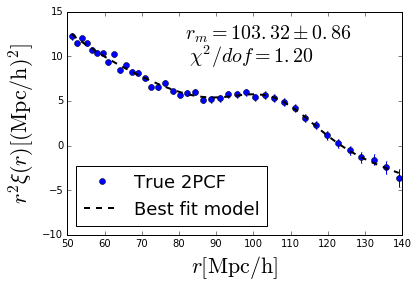

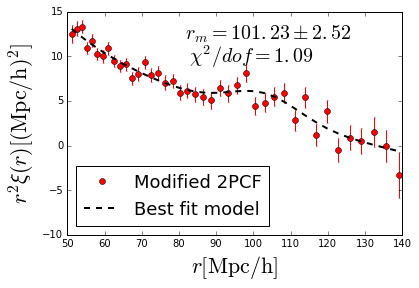

In [4]:
plot_gauss_model(r,xi,xivar,rrange=(50,140),color='blue',var=True,label='True 2PCF')
plot_gauss_model(r2,xi2,xivar2,rrange=(50,140),color='red',var=True,label='Modified 2PCF')


Now Look at the alpha value considering True GP fit as fiducial


[  9.98792526e-01   9.09699581e-01   6.05307190e+00  -8.84238763e-02
   4.00547532e-04]
[[  6.37584717e-05  -8.99871984e-05  -4.50909413e-03   1.21762306e-04
   -9.21066407e-07]
 [ -8.99871984e-05   8.69715591e-03  -3.19916077e-01   3.03224373e-03
   -4.34486100e-06]
 [ -4.50909413e-03  -3.19916077e-01   1.77304655e+01  -2.50505725e-01
    9.51031133e-04]
 [  1.21762306e-04   3.03224373e-03  -2.50505725e-01   4.36368536e-03
   -2.05379004e-05]
 [ -9.21066407e-07  -4.34486100e-06   9.51031133e-04  -2.05379004e-05
    1.13378201e-07]]
$\alpha : 0.99879 +/- 0.00798


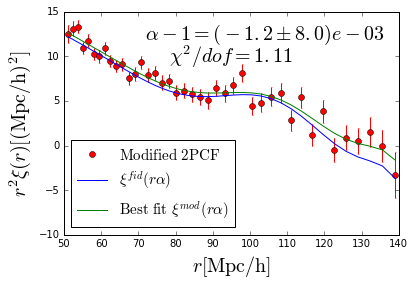

In [5]:
from regress_gp import fit_bao_model
mod1,mod2=fit_bao_model(r2,xi2,xivar2)